In [1]:
import dolfin
import matplotlib.pyplot as plt
import numpy as np

# afficher une image (bien mettre la cellule en 'Markdown')
cette cellule doit etre en Markdown
![le schema](./image.png)

# Mettre sous forme np vector un objet dolfin

In [12]:
mesh= dolfin.RectangleMesh(dolfin.Point(0., -0.05), dolfin.Point(1.0, 0.05), 20, 5)
V = dolfin.FunctionSpace(mesh,"P",1)

In [13]:
u = dolfin.Function(V)

In [14]:
u.vector().get_local()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

# re-assigner des trucs dans une expression

In [25]:
p = dolfin.Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
               degree=1, beta=1.0, R0=1.1)

In [26]:
p.beta=2.0

In [27]:
# voir une valeur
print(p.beta)

2.0


# re-assigner des trucs dans des constants-vecteurs

In [25]:
body_forces = dolfin.Constant((0., 1.0))
body_forces.values()

array([0., 1.])

In [38]:
body_forces.assign(dolfin.Constant((1.0, 1.0)))
body_forces.values()

array([1., 1.])

# re-assigner des trucs dans des constantes-scalaires

In [39]:
es = dolfin.Constant(1.1)
es.values()

array([1.1])

In [41]:
es.assign(2.0)
es.values()

array([2.])

# re-assigner des trucs dans des compiled subdomain

In [7]:
tol = 1E-10
xmin=0.5
left = dolfin.CompiledSubDomain("near(x[0], xmin, tol) && on_boundary",xmin=xmin,tol=tol)

In [8]:
left.get_property('xmin')

0.5

In [9]:
left.set_property('xmin', 0.4)

In [10]:
left.get_property('xmin')

0.4

# Differentes facons de creer le FunctionSpace

triangle
2


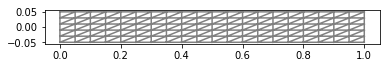

In [2]:
mesh= dolfin.RectangleMesh(dolfin.Point(0., -0.05), dolfin.Point(1.0, 0.05), 20, 5)
dolfin.plot(mesh)
print(mesh.ufl_cell())
print(mesh.geometric_dimension())

In [3]:
element = dolfin.VectorElement('P', cell=mesh.ufl_cell(), degree=1, dim=mesh.geometric_dimension())
V = dolfin.FunctionSpace(mesh, element)

In [7]:
# ou alors, plus rapide
W = dolfin.VectorFunctionSpace(mesh, 'P', 1,dim=2)

In [8]:
# pour calculer l'aire du rectangle !!
dxSEB = dolfin.Measure("dx", domain=mesh)
dolfin.assemble(dolfin.Constant(1.)*dxSEB)

0.10000000000000007

# Enumerate

In [5]:
nbriter=30
theta_values = np.linspace(0.0, 1.0,  nbriter)

In [57]:
nbriter=30
theta_values = np.linspace(0.0, 1.0,  nbriter)
lst = 0.*theta_values
theta_dep=0
theta_voulu=np.pi
for (i,t) in enumerate(theta_values):
    theta_ICI = (1-t)*theta_dep + t*theta_voulu
    lst[i] = theta_ICI**2
    print("Increment %d of %s. theta = %.2f, out = %.4f" %(i, theta_values.size,theta_ICI,lst[i]))
    print(f"Increment {i:d} of {theta_values.size:d}. theta = {theta_ICI :.2f}, out = {lst[i]:.4f}")
    #print(f"Increment {i} of {theta_values.size}. theta : {theta_ICI}, out: {lst[i]}")

Increment 0 of 30. theta = 0.00, out = 0.0000
Increment 0 of 30. theta = 0.00, out = 0.0000
Increment 1 of 30. theta = 0.11, out = 0.0117
Increment 1 of 30. theta = 0.11, out = 0.0117
Increment 2 of 30. theta = 0.22, out = 0.0469
Increment 2 of 30. theta = 0.22, out = 0.0469
Increment 3 of 30. theta = 0.32, out = 0.1056
Increment 3 of 30. theta = 0.32, out = 0.1056
Increment 4 of 30. theta = 0.43, out = 0.1878
Increment 4 of 30. theta = 0.43, out = 0.1878
Increment 5 of 30. theta = 0.54, out = 0.2934
Increment 5 of 30. theta = 0.54, out = 0.2934
Increment 6 of 30. theta = 0.65, out = 0.4225
Increment 6 of 30. theta = 0.65, out = 0.4225
Increment 7 of 30. theta = 0.76, out = 0.5750
Increment 7 of 30. theta = 0.76, out = 0.5750
Increment 8 of 30. theta = 0.87, out = 0.7511
Increment 8 of 30. theta = 0.87, out = 0.7511
Increment 9 of 30. theta = 0.97, out = 0.9506
Increment 9 of 30. theta = 0.97, out = 0.9506
Increment 10 of 30. theta = 1.08, out = 1.1736
Increment 10 of 30. theta = 1.08,

# Easy plotting

In [2]:
# taille des plot de mathplotlib
plt.rcParams["figure.figsize"] = (6, 6)

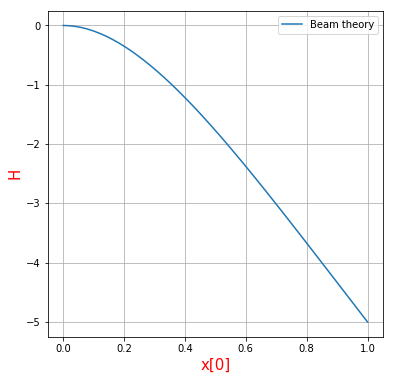

In [12]:
x = np.linspace(0.,1, num=50)
Hmax=5.0
H_formula = Hmax * (-1./3.*(x-1.)**4 - 4./3.*x + 1/3)

plt.plot(x, H_formula, label='Beam theory')
plt.xlabel('x[0]',color='red',fontsize=15)
plt.ylabel('H',color='red',fontsize=15)
#plt.legend(loc="lower right")
#plt.legend(loc="upper left")
plt.legend()
plt.grid(True)

plt.show()

# Presentation de listes

In [36]:
def poisson(q,n):
    N=q*n^2
    error = np.random.ranf()
    return 1.0/n, N, error

liste_n=[2, 4, 8, 16, 32, 64, 128, 256]

# Check convergence
h1, N1, e1 = zip(*[poisson(1, n) for n in liste_n])
h2, N2, e2 = zip(*[poisson(2, n) for n in liste_n])



def fmt(values):
    return "  ".join("%.4e" % v for v in values)

print("Convergence:")
print(" n:","        ".join("%.4d" % v for v in liste_n))
print(" n:", fmt(liste_n))
print("h1:", fmt(h1))
print("h2:", fmt(h2))
print("N1:", fmt(N1))
print("N2:", fmt(N2))
print("e1:", fmt(e1))
print("e2:", fmt(e2))



Convergence:
 n: 0002        0004        0008        0016        0032        0064        0128        0256
 n: 2.0000e+00  4.0000e+00  8.0000e+00  1.6000e+01  3.2000e+01  6.4000e+01  1.2800e+02  2.5600e+02
h1: 5.0000e-01  2.5000e-01  1.2500e-01  6.2500e-02  3.1250e-02  1.5625e-02  7.8125e-03  3.9062e-03
h2: 5.0000e-01  2.5000e-01  1.2500e-01  6.2500e-02  3.1250e-02  1.5625e-02  7.8125e-03  3.9062e-03
N1: 0.0000e+00  6.0000e+00  1.0000e+01  1.8000e+01  3.4000e+01  6.6000e+01  1.3000e+02  2.5800e+02
N2: 6.0000e+00  1.0000e+01  1.8000e+01  3.4000e+01  6.6000e+01  1.3000e+02  2.5800e+02  5.1400e+02
e1: 4.8897e-01  9.6012e-01  3.2971e-01  2.2365e-01  7.8214e-01  5.3270e-01  7.0222e-01  9.8737e-01
e2: 6.1611e-01  6.9912e-02  1.4850e-01  5.9201e-02  1.8915e-03  3.5390e-01  5.0418e-01  3.9296e-01
